In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [4]:
keras.callbacks?

In [ ]:
keras.callbacks.LearningRateScheduler?

In [ ]:
np.__version__

'1.19.5'

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
def plot_result(history, ymin=None, ymax=None):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label='train_loss')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label='train_accuracy')
    plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label='validation_acurracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if ymin!=None and ymax!=None:
        plt.ylim(ymin,ymax)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# 하이퍼 파라미터
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

In [ ]:
# Data loading 및 Dataset 생성
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()
train_image.shape, test_image.shape


11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]
IMAGE_SIZE = 28
N_CLASS = 10


In [ ]:
X_train = train_image/255.
X_test = test_image/255.
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
train_label[0]


5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [ ]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [ ]:
steps_per_epoch

600

## 모델의 크기 변경

In [ ]:
# 작은모델 => layer층, units의 수가 적은것.
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten()) # 1차원으로 변경
    
    # Hidden layer
    model.add(keras.layers.Dense(8,activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 1.3855 - accuracy: 0.5793 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4011 - accuracy: 0.8877 - val_loss: 0.3323 - val_accuracy: 0.9096
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.3055 - val_accuracy: 0.9150
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3025 - accuracy: 0.9154 - val_loss: 0.2922 - val_accuracy: 0.9191
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2817 - accuracy: 0.9201 - val_loss: 0.2804 - val_accuracy: 0.9227
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2820 - accuracy: 0.9208 - val_loss: 0.2761 - val_accuracy: 0.9239
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2704 - accuracy: 0.9244 - val_loss: 0.2732 - val_accuracy: 0.9239
Epoch 

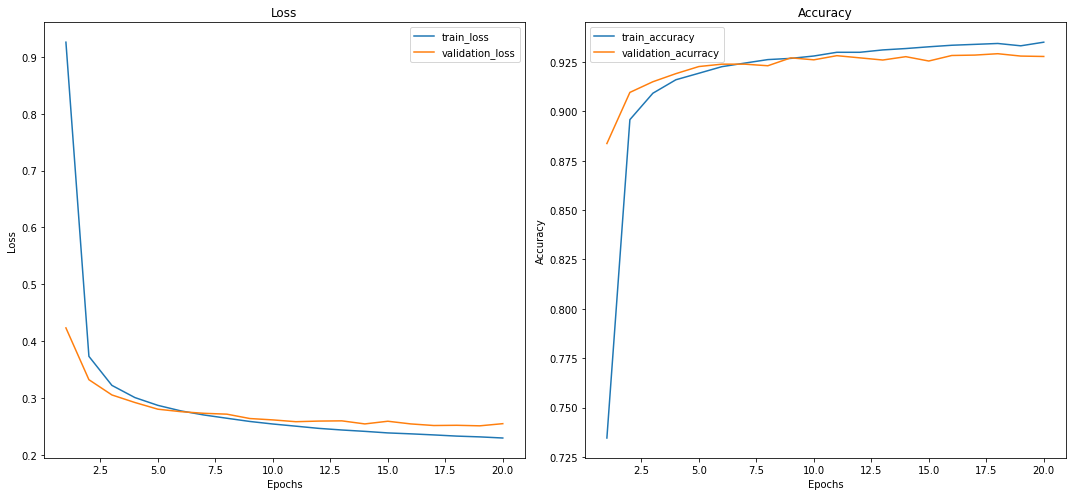

In [ ]:
plot_result(history)

In [ ]:
# 큰모델
# hidden layer : 4 - 256, 256, 128, 128
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten()) # 1차원으로 변경
    
    # Hidden layer
    model.add(keras.layers.Dense(512,activation='relu'))
    model.add(keras.layers.Dense(256,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))
    model.add(keras.layers.Dense(128,activation='relu'))

    
    
    # Output layer
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 583,946
Trainable params: 583,946
Non-trainable params: 0
________________________________________________

In [ ]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4465 - accuracy: 0.8715 - val_loss: 0.1145 - val_accuracy: 0.9636
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9709 - val_loss: 0.0837 - val_accuracy: 0.9727
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.0766 - val_accuracy: 0.9758
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0926 - val_accuracy: 0.9724
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0880 - val_accuracy: 0.9747
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0752 - val_accuracy: 0.9789
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.1096 - val_accuracy: 0.9757
Epoch 

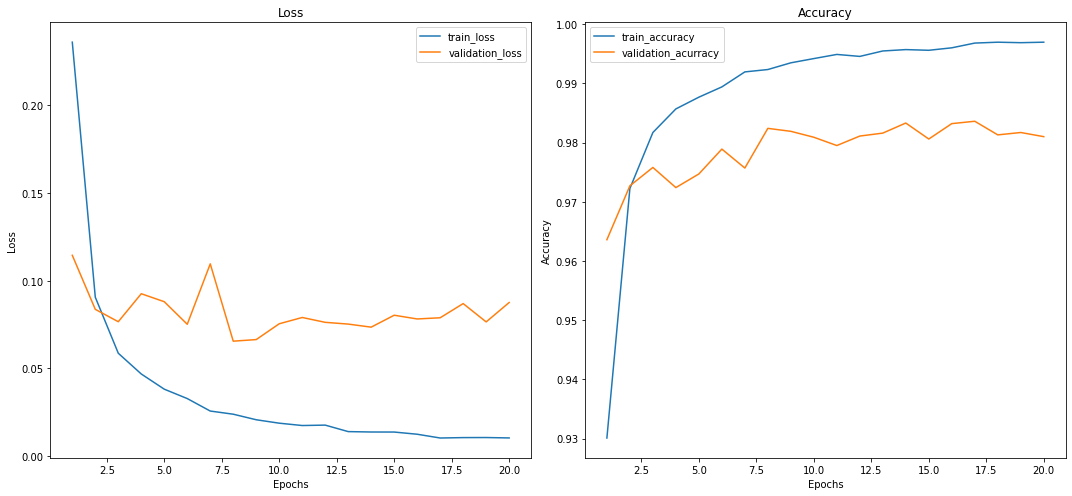

In [ ]:
plot_result(history)

# Dropout 적용
- dropout layer는 적용하려는  layer 앞에 추가한다.
- dropout 비율은 0 ~ 1 사이 실수로 지정는데 보통 0.2 ~ 0.5값을 지정한다.
- dropout이 적용된 모델을 학습시킬때는 epoch수를 더 늘려서 사용한다.

In [ ]:
DROPOUT_RATE = 0.5
def create_dropout_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten()) # 1차원으로 변경
    
    # Hidden layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(512,activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(256,activation='relu'))
    
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128,activation='relu'))

    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(128,activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dropout(rate=DROPOUT_RATE))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    # Compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = create_dropout_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras.utils import plot_model

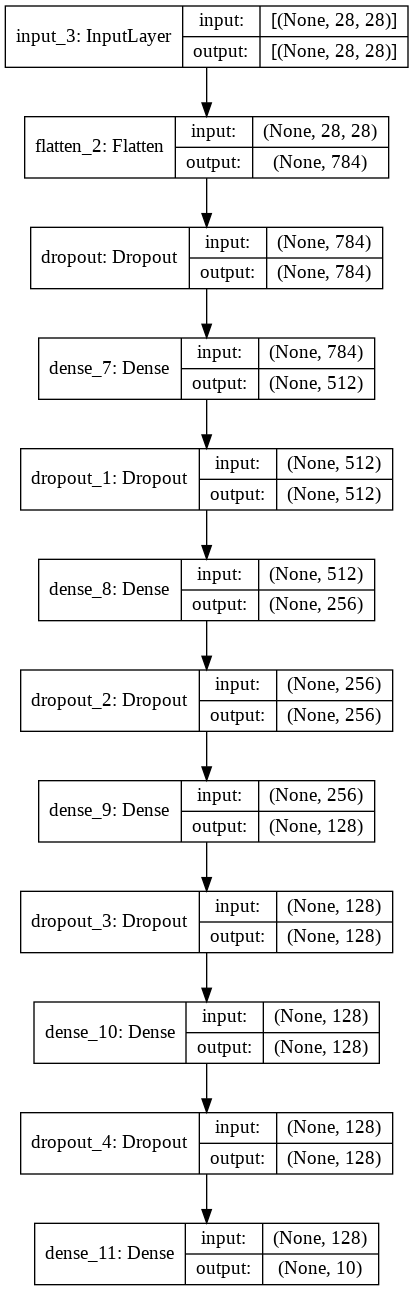

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
# 학습
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 1.6123 - accuracy: 0.4216 - val_loss: 0.2891 - val_accuracy: 0.9239
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.5473 - accuracy: 0.8462 - val_loss: 0.1956 - val_accuracy: 0.9436
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4243 - accuracy: 0.8848 - val_loss: 0.1605 - val_accuracy: 0.9556
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3504 - accuracy: 0.9049 - val_loss: 0.1400 - val_accuracy: 0.9627
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3131 - accuracy: 0.9146 - val_loss: 0.1366 - val_accuracy: 0.9623
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3045 - accuracy: 0.9186 - val_loss: 0.1218 - val_accuracy: 0.9646
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2786 - accuracy: 0.9240 - val_loss: 0.1088 - val_accuracy: 0.9702
Epoch 

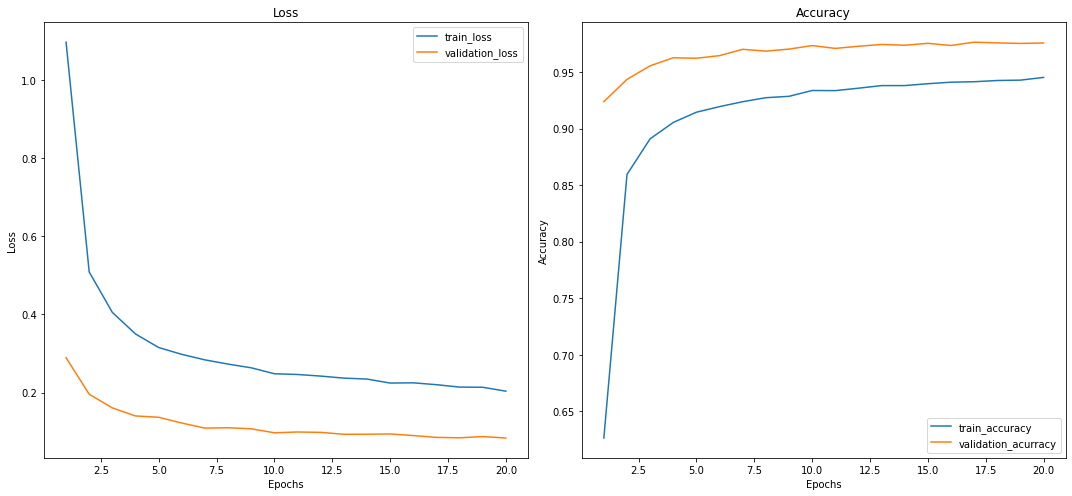

In [ ]:
plot_result(history)

In [ ]:
model.evaluate(val_dataset)

100/100 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9758


[0.08348888903856277, 0.9757999777793884]

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:

pred_dataset = X_test[:5]
pred_dataset.shape

(5, 28, 28)

In [ ]:
pred = model.predict(pred_dataset)

In [ ]:
np.argmax(pred, axis=1)

array([7, 2, 1, 0, 4])

In [ ]:
test_label[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Batch Normalization

In [ ]:
def create_BN_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE, IMAGE_SIZE)))
    model.add(keras.layers.Flatten())

    # Hidden
    model.add(keras.layers.Dense(256)) # Fully Connected Layer (Dense Layer)
    # Batch Normalization, Dense layer와 activation layer 사이.
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU()) # Activation Layer

    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())

    # Output
    model.add(keras.layers.Dense(N_CLASS))
    # Batch Normalization, Dense layer와 activation layer 사이.
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Softmax()) # keras.layers.Activation('sigmoid')# sigmoid는 함수가없다.

    # Compile
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
model = create_BN_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)              

In [ ]:
histroy = model.fit(train_dataset,
                     epochs = N_EPOCHS,
                    steps_per_epoch= steps_per_epoch,
                    validation_data= val_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.6068 - accuracy: 0.8782 - val_loss: 0.1994 - val_accuracy: 0.9696
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1778 - accuracy: 0.9721 - val_loss: 0.1113 - val_accuracy: 0.9784
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1116 - accuracy: 0.9795 - val_loss: 0.0901 - val_accuracy: 0.9795
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0791 - accuracy: 0.9838 - val_loss: 0.0757 - val_accuracy: 0.9829
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0568 - accuracy: 0.9877 - val_loss: 0.0839 - val_accuracy: 0.9767
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0477 - accuracy: 0.9895 - val_loss: 0.0737 - val_accuracy: 0.9802
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0378 - accuracy: 0.9913 - val_loss: 0.0620 - val_accuracy: 0.9841
Epoch 

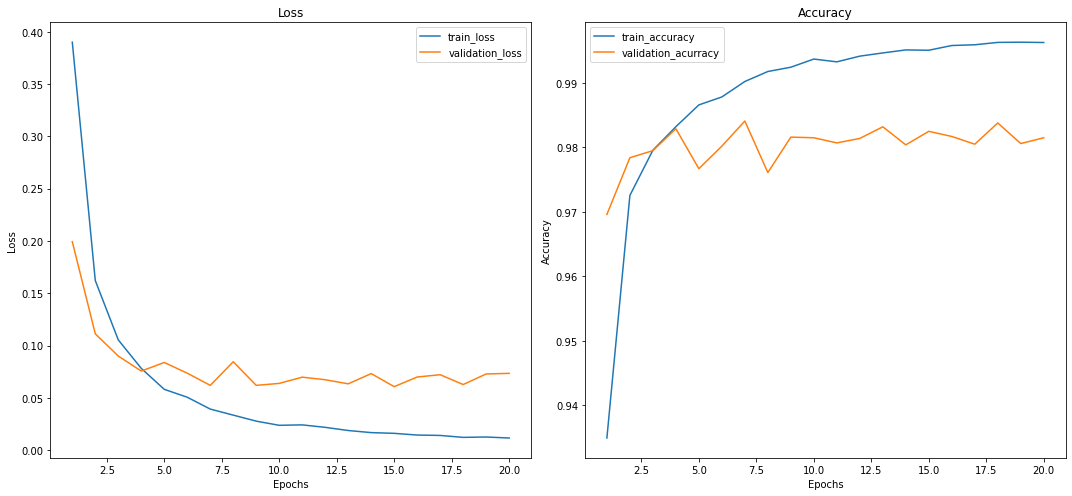

In [ ]:
plot_result(histroy)

# 학습률 조절

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 30


def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((IMAGE_SIZE,IMAGE_SIZE)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(128, activation="relu"))

    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))

    return model



## ExponentialDecay 를 사용
- 일정한 step마다 일정한 비율로 학습률을 변경(줄여준다).
- LearningRate Scaduler

In [ ]:
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate = LEARNING_RATE, # 시작 학습률
            decay_steps=N_BATCHS*10, #학습률을 몇 step마다 변화(변경) 시킬 것 인지.
            decay_rate = 0.5, # 학습율의 변화율, 기존학습률 * 지정한 값, 
            staircase=True, # True : 한번에 변경, False : 매 스탭마다 조금씩 변화, 
#            name=None
) # optimizer의 학습률대신 lr_schduler를 설정.

In [ ]:
model = create_model()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.4734 - accuracy: 0.8675 - val_loss: 0.1216 - val_accuracy: 0.9646
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0993 - accuracy: 0.9694 - val_loss: 0.0758 - val_accuracy: 0.9756
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0688 - val_accuracy: 0.9799
Epoch 4/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0629 - val_accuracy: 0.9802
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0636 - val_accuracy: 0.9812
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0163 - accuracy: 0.9962 - val_loss: 0.0609 - val_accuracy: 0.9813
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.0116 - accuracy: 0.9982 - val_loss: 0.0618 - val_accuracy: 0.9810
Epoch 

# LearningRate 조정과 관련된 callback사용.
- Callback : 학습 도중 특정 이벤트(변화)가 발생하면 호출되는 기능

## ReduceLROnPlateau callback
- patience 에폭 동안 moniotr에 지정한 지표가 향샹되지 않으면 현재 learning rate에 factor(0 ~ 1 실수)를 곱해서 learning rate를 조정한다.

In [ ]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# ReduceLROnPlateau callback 생성
rlp_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', # validation loss의 지표가 향상되지 않으면,
                                                 factor=0.5, # 현재 학습률에 0.5 곱한것을 새학습률로 조정.
                                                 patience=3, # 10 에폭동안.
                                                 verbose=1) # 학습률이 바뀌면 로그를 출력.

# Callback은 fit할때 적용.

In [ ]:
history = model.fit(train_dataset,
                    epochs=N_EPOCHS,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_dataset,
                    validation_steps=validation_steps,
                    callbacks=[rlp_callback])

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 3.7504e-06 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9862
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 2.9727e-06 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9864
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3199e-06 - accuracy: 1.0000 - val_loss: 0.1028 - val_accuracy: 0.9864
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 1.7895e-06 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9865

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 1.3430e-06 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9864
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 1.1424e-06 - accuracy: 1.0000 - val_loss: 0.1072 - val_accuracy: 0.9862
Epoch 7/30
600/600 [=======================

## LearningRateScheduler Callback 사용
- 사용자 정의 학습률 조정함수를 만들어 적용.
- 학습률 조정하는 함수를 만들어서 callback 생성시 등록.
    - 매개변수
        1. epoch
        2. 현시점 learning rate
    - 반환값
        - 조정한 learning rate

In [ ]:
def user_lr(epoch, lr):
    if epoch < 5:
        return lr

    elif epoch <10:
        if epoch==6:
            print("=================Change Learning Rate", lr*0.5, "Epoch: ", epoch)
        return lr*0.5

    elif epoch <20:
        if epoch==11:
            print("=================Change Learning Rate", lr*0.5, "Epoch: ", epoch)
        return lr*0.5
    else:
        return lr

In [ ]:
lr_scheduler_callback = keras.callbacks.LearningRateScheduler(user_lr)

model = create_model()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, 
                    epochs=N_EPOCHS, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data= val_dataset, 
                    validation_steps=validation_steps,
                    callbacks=[lr_scheduler_callback])

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 0.4564 - accuracy: 0.8708 - val_loss: 0.1323 - val_accuracy: 0.9595
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 0.1013 - accuracy: 0.9686 - val_loss: 0.0865 - val_accuracy: 0.9727
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0807 - val_accuracy: 0.9750
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0903 - val_accuracy: 0.9751
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0690 - val_accuracy: 0.9795
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 0.0718 - val_accuracy: 0.9816
Epoch 7/30
=================Change Learning Rate 0.0002500000118743628 Epoch:  6
600/600 [==============================] - 2s 3ms/step - loss: 0.00